## Business Case: OLA - Ensemble Learning




<br>
<br>

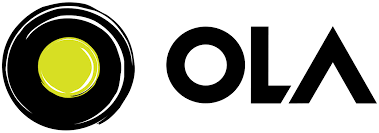

### About OLA

Ola is an Indian multinational ride-hailing company that provides a platform for customers to book rides, including taxis, auto-rickshaws, and other forms of shared transportation. The company is headquartered in Bangalore, Karnataka, and operates in numerous cities across India and internationally.

- **Key Features of Ola:**

    - Ola Mini: Affordable, small cars for budget-friendly rides.
    - Ola Prime: Premium car rides for a more luxurious experience.
    - Ola Auto: Auto-rickshaws for short-distance travel.
    - Ola Share: A carpooling service for a more economical option. 

- **Vision:**
    - Ola's mission is to "build mobility for a billion people" by providing a more sustainable, efficient, and accessible transportation experience. Through innovations in technology and sustainability, Ola aims to lead the future of transportation in India and globally.

### About Data

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

### Objective



You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like:
- Demographics (city, age, gender etc.)
- Tenure information (joining date, Last Date)
- Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income).

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score,
    ConfusionMatrixDisplay, RocCurveDisplay,f1_score,recall_score,precision_score
)


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [132]:
df=pd.read_csv("ola_driver.csv")

In [133]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [134]:
df.shape

(19104, 14)

In [135]:
df=df.drop(columns="Unnamed: 0")

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


##Converting 'MMM-YY' feature to datetime type

In [137]:
df["MMM-YY"] = pd.to_datetime(df["MMM-YY"])
df["Dateofjoining"] = pd.to_datetime(df["Dateofjoining"])
df["LastWorkingDate"] = pd.to_datetime(df["LastWorkingDate"])

In [138]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1


In [139]:
df.rename(columns={"MMM-YY":"Reporting Date"},inplace="True")

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Reporting Date        19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [141]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Reporting Date,19104,2019-12-11 02:09:29.849246464,2019-01-01 00:00:00,2019-06-01 00:00:00,2019-12-01 00:00:00,2020-07-01 00:00:00,2020-12-01 00:00:00,NaN
Driver_ID,19104.0,1415.591133,1.0,710.0,1417.0,2137.0,2788.0,810.705321
Age,19043.0,34.668435,21.0,30.0,34.0,39.0,58.0,6.257912
Gender,19052.0,0.418749,0.0,0.0,0.0,1.0,1.0,0.493367
Education_Level,19104.0,1.021671,0.0,0.0,1.0,2.0,2.0,0.800167
Income,19104.0,65652.025126,10747.0,42383.0,60087.0,83969.0,188418.0,30914.515344
Dateofjoining,19104,2018-04-28 20:52:54.874371840,2013-04-01 00:00:00,2016-11-29 12:00:00,2018-09-12 00:00:00,2019-11-05 00:00:00,2020-12-28 00:00:00,NaN
LastWorkingDate,1616,2019-12-21 20:59:06.534653696,2018-12-31 00:00:00,2019-06-06 00:00:00,2019-12-20 12:00:00,2020-07-03 00:00:00,2020-12-28 00:00:00,NaN
Joining Designation,19104.0,1.690536,1.0,1.0,1.0,2.0,5.0,0.836984
Grade,19104.0,2.25267,1.0,1.0,2.0,3.0,5.0,1.026512


In [142]:
df.describe(include="object").T

,count,unique,top,freq
City,19104,29,C20,1008


In [143]:
df.isna().sum().sort_values(ascending=False)

LastWorkingDate         17488
Age                        61
Gender                     52
Reporting Date              0
Driver_ID                   0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [144]:
round(((df.isna().sum()/df.shape[0])*100),2).sort_values(ascending=False)

LastWorkingDate         91.54
Age                      0.32
Gender                   0.27
Reporting Date           0.00
Driver_ID                0.00
City                     0.00
Education_Level          0.00
Income                   0.00
Dateofjoining            0.00
Joining Designation      0.00
Grade                    0.00
Total Business Value     0.00
Quarterly Rating         0.00
dtype: float64

**Notice LastWorkingDate has 91 % null values and rest of our data is no nulls except few in gender column.**

In [145]:
df.duplicated().sum()

0

In [146]:
df.nunique().sort_values(ascending=False)

Total Business Value    10181
Income                   2383
Driver_ID                2381
Dateofjoining             869
LastWorkingDate           493
Age                        36
City                       29
Reporting Date             24
Joining Designation         5
Grade                       5
Quarterly Rating            4
Education_Level             3
Gender                      2
dtype: int64

In [147]:
# List of categorical columns
cat_cols = df.select_dtypes(include="object")

# List of numerical columns excluding date columns
num_cols = df.select_dtypes(include="number")

In [148]:
num_cols.head()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,28.0,0.0,2,57387,1,1,2381060,2
1,1,28.0,0.0,2,57387,1,1,-665480,2
2,1,28.0,0.0,2,57387,1,1,0,2
3,2,31.0,0.0,2,67016,2,2,0,1
4,2,31.0,0.0,2,67016,2,2,0,1


In [149]:
num_cols.isna().sum().sort_values(ascending=False)

Age                     61
Gender                  52
Driver_ID                0
Education_Level          0
Income                   0
Joining Designation      0
Grade                    0
Total Business Value     0
Quarterly Rating         0
dtype: int64

### Applying KNN Imputation for missing values

In [150]:
# Removing the Driver_ID column as it can heavily skew the distance calculation, resulting in incorrect imputations.
num_cols.drop(columns="Driver_ID",inplace=True)

In [151]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform", metric="nan_euclidean")
imputed_df = knn_imputer.fit_transform(num_cols)

In [152]:
df_new= pd.DataFrame(imputed_df, columns=num_cols.columns)
df_new["Driver_ID"] = df["Driver_ID"]

In [153]:
df_new.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Driver_ID
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,1
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,1
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,1
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2


In [154]:
df_new.isnull().sum()

Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
Driver_ID               0
dtype: int64

**Now we don't have any missing data**

### Merging the remaining column to the new imputed datset

In [155]:
remaining_columns=list(set(df.columns).difference(set(df_new.columns)))

In [156]:
df1=pd.concat([df_new, df[remaining_columns]],axis=1)

In [157]:
df1.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Driver_ID,City,LastWorkingDate,Dateofjoining,Reporting Date
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,1,C23,NaT,2018-12-24,2019-01-01
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,1,C23,NaT,2018-12-24,2019-02-01
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,1,C23,2019-03-11,2018-12-24,2019-03-01
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2,C7,NaT,2020-11-06,2020-11-01
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2,C7,NaT,2020-11-06,2020-12-01


In [158]:
df.head(1)

,Reporting Date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2


In [159]:
function_dict = {"Driver_ID":"first",
                 "Reporting Date":"count",
                 "Age":"max",
                 "Gender":"first",
                 "City":"first",
                 "Education_Level":"last",
                 "Income":"last",
                 "Dateofjoining":"last",
                 "LastWorkingDate":"last",
                 "Joining Designation":"last",
                 "Grade":"last",
                 "Total Business Value":"sum",
                 "Quarterly Rating":"last"}
df2=df1.groupby("Driver_ID").aggregate(function_dict)

In [160]:
df2.rename(columns={"Reporting Date":"Reporting_count"},inplace="True")
df2.reset_index(drop=True,inplace=True)

In [161]:
df2.head()

,Driver_ID,Reporting_count,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,3,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1.0,1.0,1715580.0,2.0
1,2,2,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaT,2.0,2.0,0.0,1.0
2,4,5,43.0,0.0,C13,2.0,65603.0,2019-12-07,2020-04-27,2.0,2.0,350000.0,1.0
3,5,3,29.0,0.0,C9,0.0,46368.0,2019-01-09,2019-03-07,1.0,1.0,120360.0,1.0
4,6,5,31.0,1.0,C11,1.0,78728.0,2020-07-31,NaT,3.0,3.0,1265000.0,2.0


## Feature Engineering

### Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1

In [162]:
qr1 = df.groupby("Driver_ID").agg({"Quarterly Rating":"first"}).reset_index()

In [163]:
df2["Quarterly_Rating_Increased"]=np.where(df2[["Quarterly Rating"]]>qr1[["Quarterly Rating"]],1,0)

In [164]:
df2.head()

,Driver_ID,Reporting_count,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased
0,1,3,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1.0,1.0,1715580.0,2.0,0
1,2,2,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaT,2.0,2.0,0.0,1.0,0
2,4,5,43.0,0.0,C13,2.0,65603.0,2019-12-07,2020-04-27,2.0,2.0,350000.0,1.0,0
3,5,3,29.0,0.0,C9,0.0,46368.0,2019-01-09,2019-03-07,1.0,1.0,120360.0,1.0,0
4,6,5,31.0,1.0,C11,1.0,78728.0,2020-07-31,NaT,3.0,3.0,1265000.0,2.0,1


### Target variable creation: Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1

In [165]:
df2["target"]=df2["LastWorkingDate"].apply(lambda x: 0 if pd.isna(x) else 1)

In [166]:
df2.head()

,Driver_ID,Reporting_count,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,target
0,1,3,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1.0,1.0,1715580.0,2.0,0,1
1,2,2,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaT,2.0,2.0,0.0,1.0,0,0
2,4,5,43.0,0.0,C13,2.0,65603.0,2019-12-07,2020-04-27,2.0,2.0,350000.0,1.0,0,1
3,5,3,29.0,0.0,C9,0.0,46368.0,2019-01-09,2019-03-07,1.0,1.0,120360.0,1.0,0,1
4,6,5,31.0,1.0,C11,1.0,78728.0,2020-07-31,NaT,3.0,3.0,1265000.0,2.0,1,0


### Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1

In [167]:
income_first = df.groupby("Driver_ID").agg({"Income":"first"}).reset_index()

In [168]:
df2["Income_Increased"]=np.where(df2["Income"] > income_first["Income"],1,0)

In [169]:
df2

,Driver_ID,Reporting_count,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,target,Income_Increased
0,1,3,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1.0,1.0,1715580.0,2.0,0,1,0
1,2,2,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaT,2.0,2.0,0.0,1.0,0,0,0
2,4,5,43.0,0.0,C13,2.0,65603.0,2019-12-07,2020-04-27,2.0,2.0,350000.0,1.0,0,1,0
3,5,3,29.0,0.0,C9,0.0,46368.0,2019-01-09,2019-03-07,1.0,1.0,120360.0,1.0,0,1,0
4,6,5,31.0,1.0,C11,1.0,78728.0,2020-07-31,NaT,3.0,3.0,1265000.0,2.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,24,34.0,0.0,C24,0.0,82815.0,2015-10-15,NaT,2.0,3.0,21748820.0,4.0,1,0,0
2377,2785,3,34.0,1.0,C9,0.0,12105.0,2020-08-28,2020-10-28,1.0,1.0,0.0,1.0,0,1,0
2378,2786,9,45.0,0.0,C19,0.0,35370.0,2018-07-31,2019-09-22,2.0,2.0,2815090.0,1.0,0,1,0
2379,2787,6,28.0,1.0,C20,2.0,69498.0,2018-07-21,2019-06-20,1.0,1.0,977830.0,1.0,0,1,0


In [170]:
df2["Income_Increased"].value_counts()

Income_Increased
0    2338
1      43
Name: count, dtype: int64

### Statistical summary of the derived dataset

In [171]:
df2.describe().T

,count,mean,min,25%,50%,75%,max,std
Driver_ID,2381.0,1397.559009,1.0,695.0,1400.0,2100.0,2788.0,806.161628
Reporting_count,2381.0,8.02352,1.0,3.0,5.0,10.0,24.0,6.78359
Age,2381.0,33.770181,21.0,30.0,33.0,37.0,58.0,5.933265
Gender,2381.0,0.411172,0.0,0.0,0.0,1.0,1.0,0.49174
Education_Level,2381.0,1.00756,0.0,0.0,1.0,2.0,2.0,0.81629
Income,2381.0,59334.157077,10747.0,39104.0,55315.0,75986.0,188418.0,28383.666384
Dateofjoining,2381,2019-02-08 07:14:50.550189056,2013-04-01 00:00:00,2018-06-29 00:00:00,2019-07-21 00:00:00,2020-05-02 00:00:00,2020-12-28 00:00:00,NaN
LastWorkingDate,1616,2019-12-21 20:59:06.534653440,2018-12-31 00:00:00,2019-06-06 00:00:00,2019-12-20 12:00:00,2020-07-03 00:00:00,2020-12-28 00:00:00,NaN
Joining Designation,2381.0,1.820244,1.0,1.0,2.0,2.0,5.0,0.841433
Grade,2381.0,2.096598,1.0,1.0,2.0,3.0,5.0,0.941522


In [172]:
df2.describe(include="object").T

,count,unique,top,freq
City,2381,29,C20,152


In [173]:
df2.shape

(2381, 16)

In [174]:
round(np.sum(df2["Quarterly_Rating_Increased"]==1)/(df2.shape[0])*100,2)

15.04

**15 % of the total employee got an increment in their quarterly rating between 2019-20.**

In [175]:
round(np.sum(df2["target"]==1)/(df2.shape[0])*100,2)

67.87

**Around 68 % employee left the company between 2019-20.**

In [176]:
round(np.sum(df2["Income_Increased"]==1)/(df2.shape[0])*100,2)

1.81

**Around 1.8 % employee got a raise in the income between 2019-20.**

### All unique values in categorical columns

In [177]:
cat_cols=["Gender","City","Education_Level","Joining Designation","Grade","Quarterly Rating","Quarterly_Rating_Increased","Income_Increased","target"]

In [178]:
for i in cat_cols:
 print(df2[i].value_counts(normalize=True))
 print("-"*280)

Gender
0.0    0.587988
1.0    0.409912
0.6    0.000840
0.8    0.000840
0.2    0.000420
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
City
C20    0.063839
C15    0.042419
C29    0.040319
C26    0.039059
C8     0.037379
C27    0.037379
C10    0.036119
C16    0.035279
C22    0.034439
C3     0.034439
C28    0.034439
C12    0.034019
C5     0.033599
C1     0.033599
C21    0.033179
C14    0.033179
C6     0.032759
C4     0.032339
C7     0.031919
C9     0.031499
C25    0.031079
C23    0.031079
C24    0.030659
C19    0.030239
C2     0.030239
C17    0.029819
C13    0.029819
C18    0.028979
C11    0.026879
Name: proportion, dtype: float64
-------------------------------------------------------------------------------------------------

- **Around 59 % employees are of the Male gender.**
- **Around 6.4 % employees are from city C20.**
- **Number of employees in all the three education level is almost same.**
- **Around 35 % of the employees reported at grade 2 followed by 32 % at 1.**
- **Around 73% of the employees had their last quarterly rating as 1 followed by 15 % as2.**
- **Only 15 % of the employees got a raise in their quarterly rating.**
- **98 % of the employees didn't see any increase in their income from first to last quarter.**
- **Around 68 % of the employees left the organization in these two years.**

## Graphical Analysis

## Univariate Analysis

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

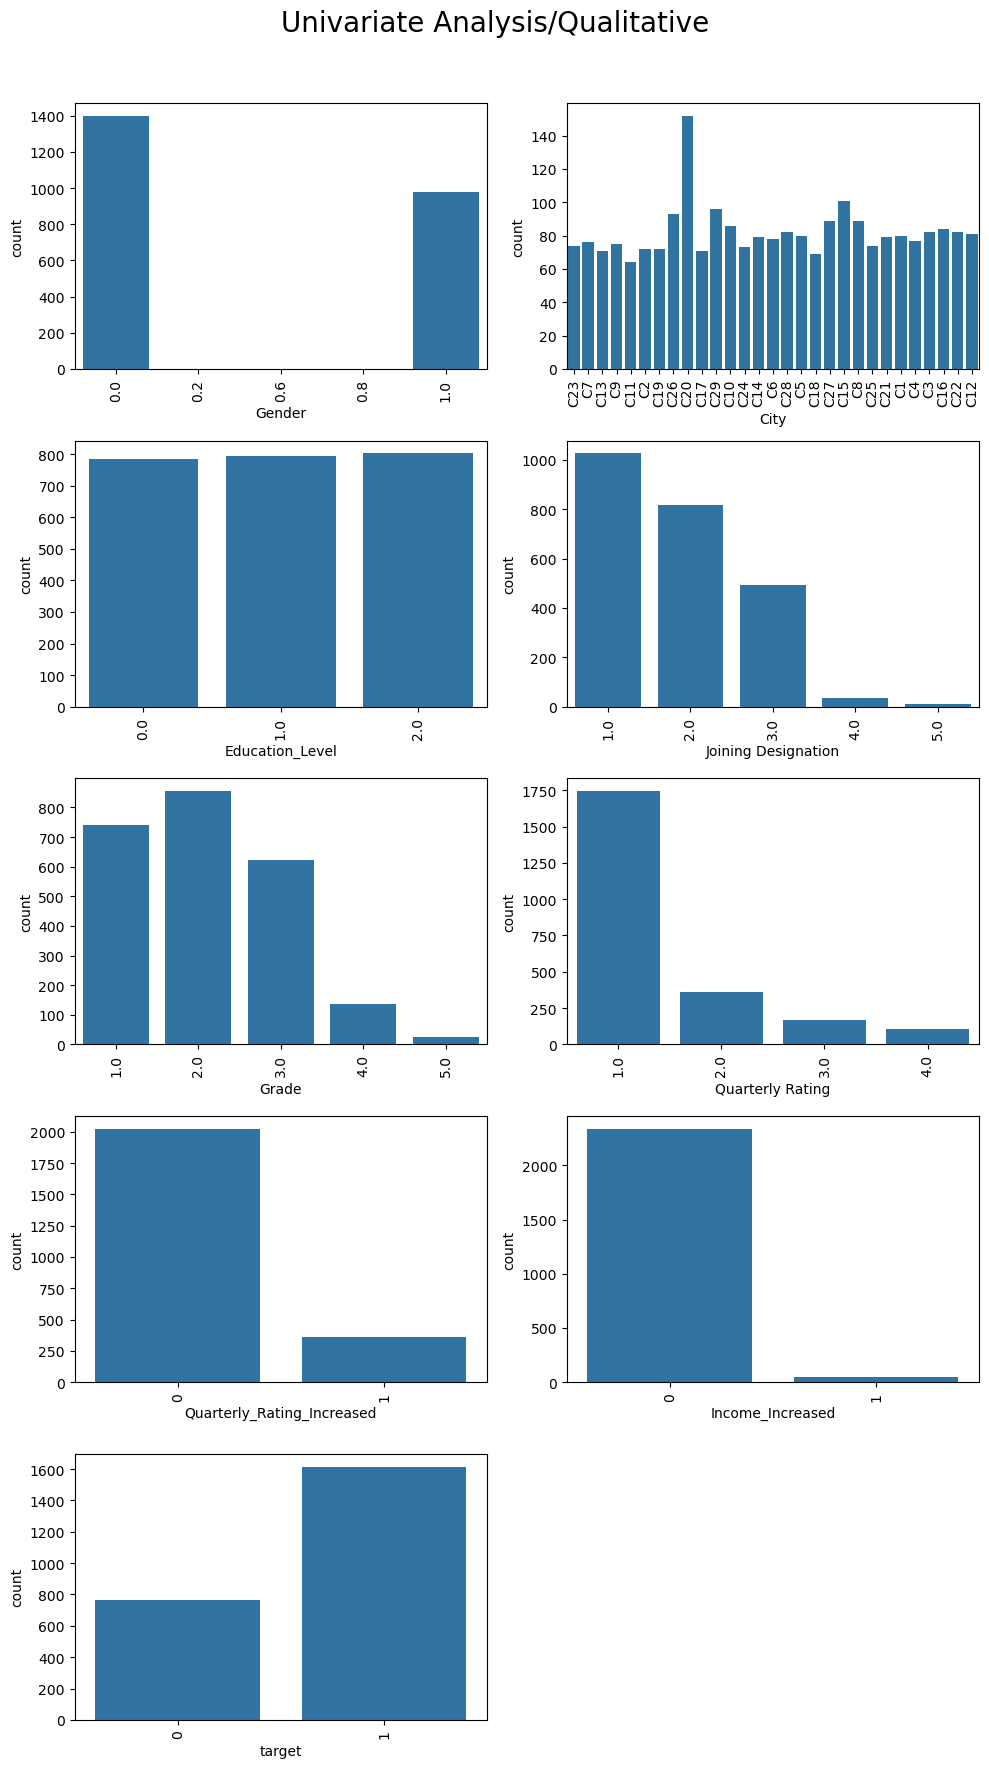

In [180]:
fig = plt.figure(figsize=(10,18)) 
for i,col in enumerate(cat_cols,1):
    plt.subplot(5,2,i)
    sns.countplot(x=col,data=df2)
    plt.xticks(rotation=90)
    fig.suptitle("Univariate Analysis/Qualitative",fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

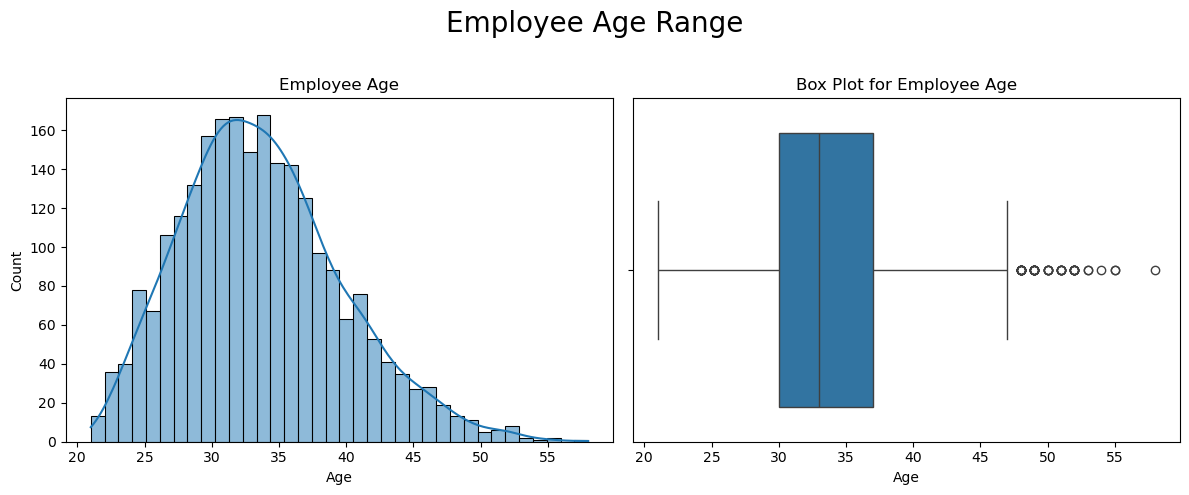

In [181]:
fig = plt.figure(figsize=(12,5)) 
plt.subplot(1,2,1)
sns.histplot(x="Age",data=df2,kde=True)
plt.title("Employee Age")
plt.subplot(1,2,2)
sns.boxplot(x="Age",data=df2)
plt.title("Box Plot for Employee Age")
fig.suptitle("Employee Age Range",fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Age Range plot is slightly right skewed as it has some outlier values which can clearly see in the box plot**

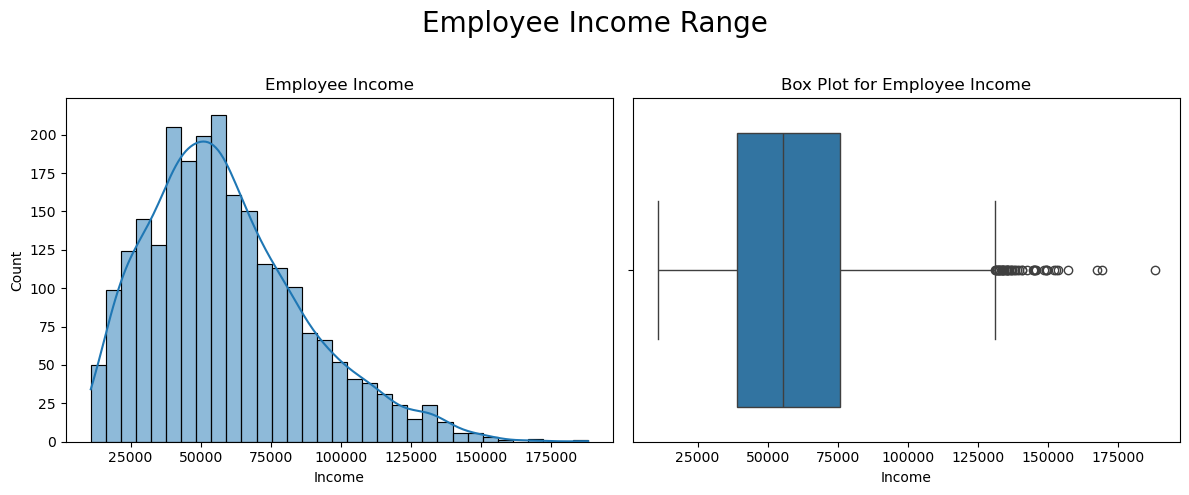

In [182]:
fig = plt.figure(figsize=(12,5)) 
plt.subplot(1,2,1)
sns.histplot(x="Income",data=df2,kde=True)
plt.title("Employee Income")
plt.subplot(1,2,2)
sns.boxplot(x="Income",data=df2)
plt.title("Box Plot for Employee Income")
fig.suptitle("Employee Income Range",fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**We can clearly infer from both the plots that income column contains a lot of outliers.**

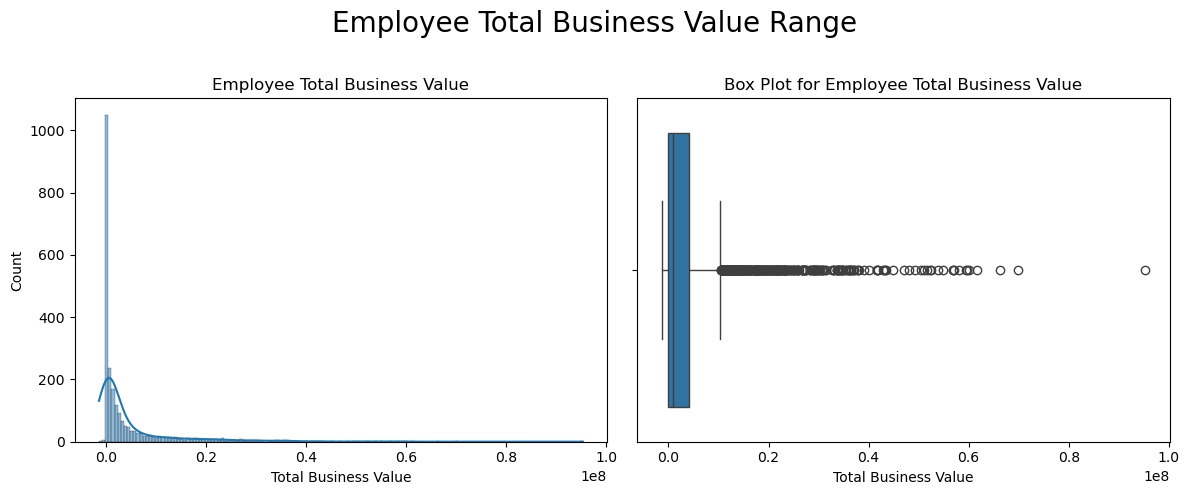

In [183]:
fig = plt.figure(figsize=(12,5)) 
plt.subplot(1,2,1)
sns.histplot(x="Total Business Value",data=df2,kde=True)
plt.title("Employee Total Business Value")
plt.subplot(1,2,2)
sns.boxplot(x="Total Business Value",data=df2)
plt.title("Box Plot for Employee Total Business Value")
fig.suptitle("Employee Total Business Value Range",fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**From the both plots we can clearly see that Total Business Value colum is highly right skewed. so, it contains very high amount of outliers and we need to treat this column necessarily.**

## Bivariate Analysis

## Categorical column vs target/Churn

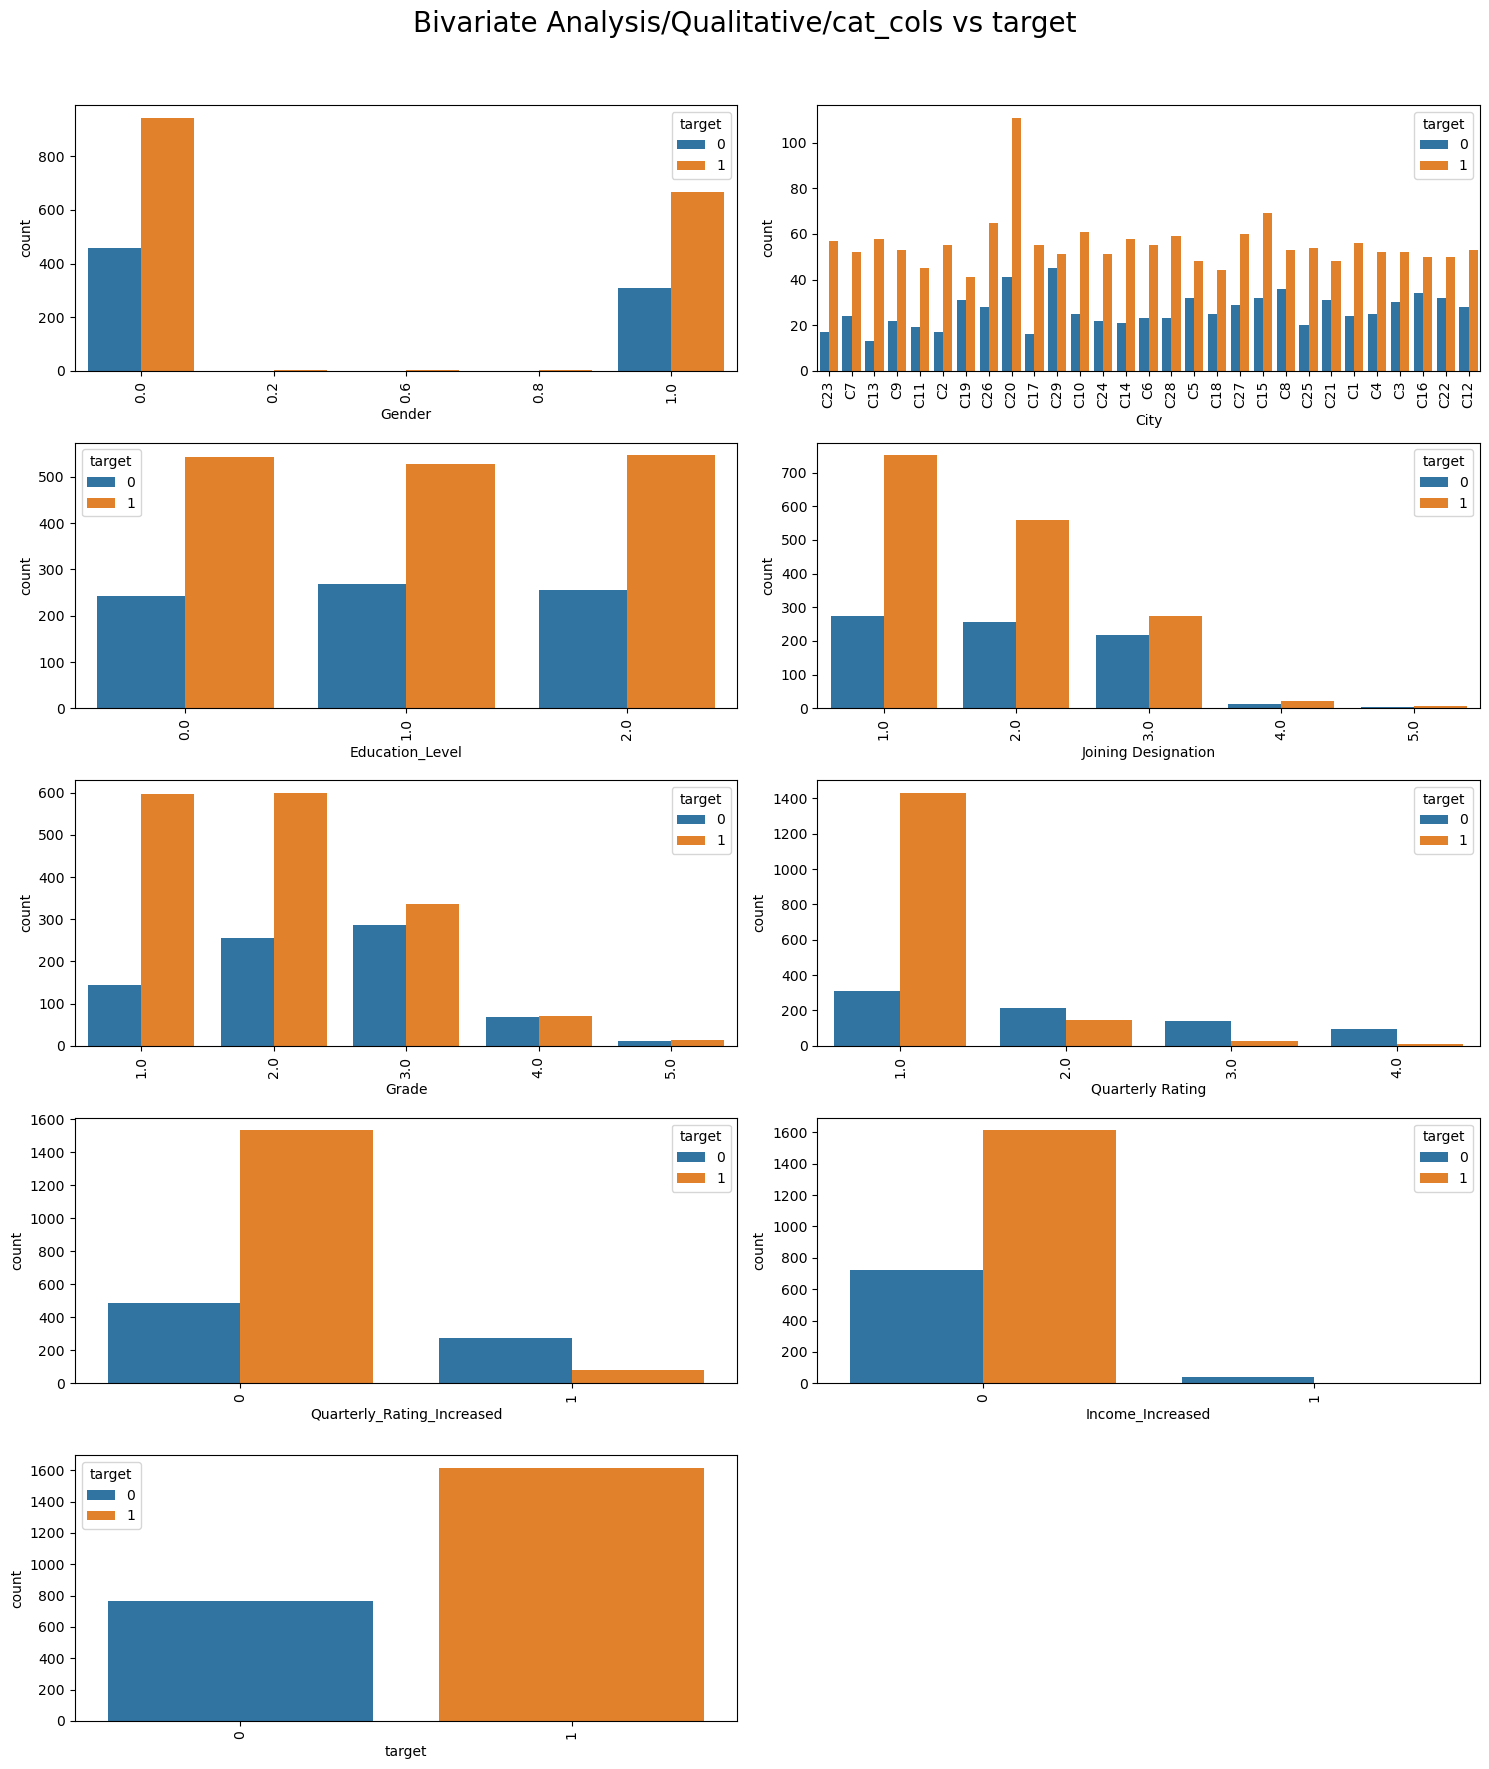

In [184]:
fig = plt.figure(figsize=(15,18)).suptitle("Bivariate Analysis/Qualitative/cat_cols vs target",fontsize=20) 
for i,col in enumerate(cat_cols,1):
    plt.subplot(5,2,i)
    sns.countplot(x=col,hue="target", data=df2) 
    plt.xticks(rotation=90)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

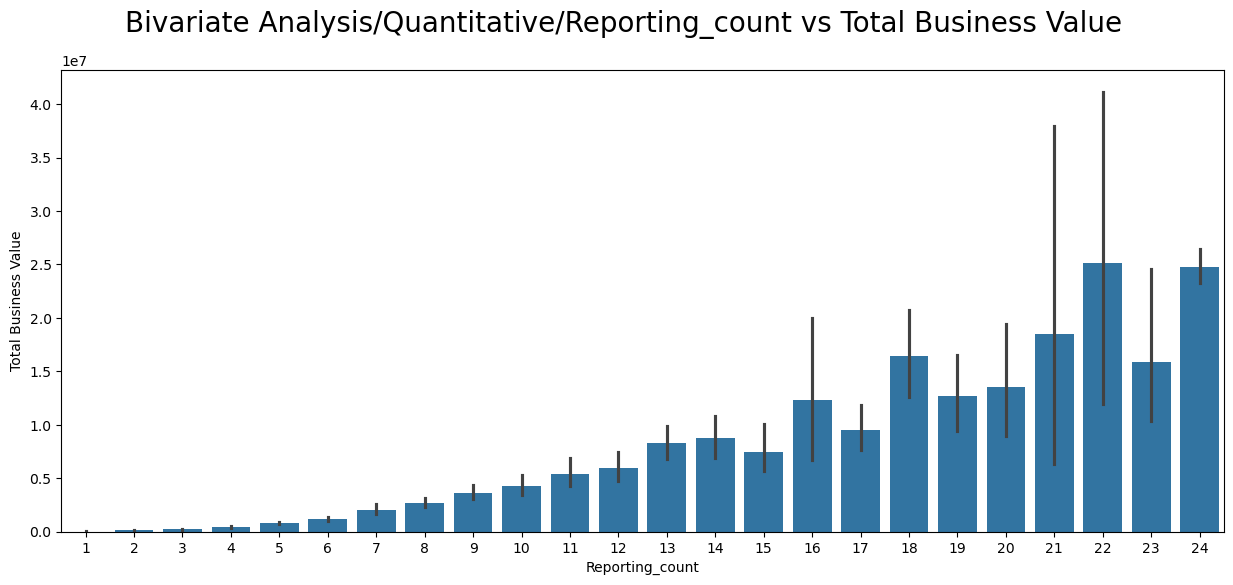

In [185]:
fig = plt.figure(figsize=(15,6)).suptitle("Bivariate Analysis/Quantitative/Reporting_count vs Total Business Value",fontsize=20) 
sns.barplot(x="Reporting_count",y="Total Business Value",data=df2)
plt.show()

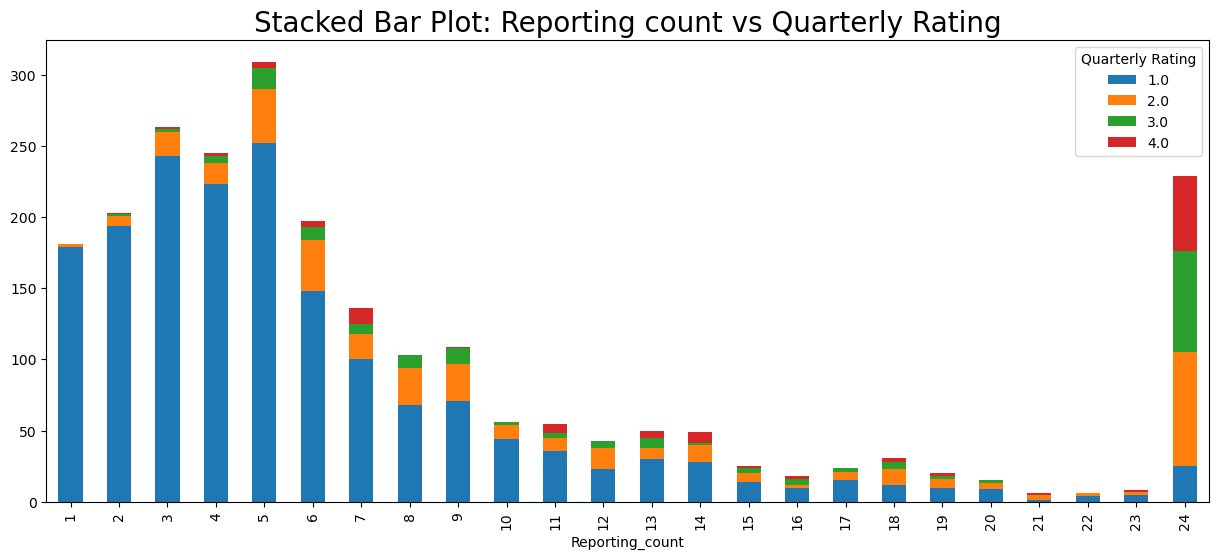

In [186]:
df_counts = pd.crosstab(df2["Reporting_count"], df2["Quarterly Rating"])
df_counts.plot(kind="bar", stacked=True, figsize=(15,6))
plt.title("Stacked Bar Plot: Reporting count vs Quarterly Rating",fontsize=20)
plt.show()

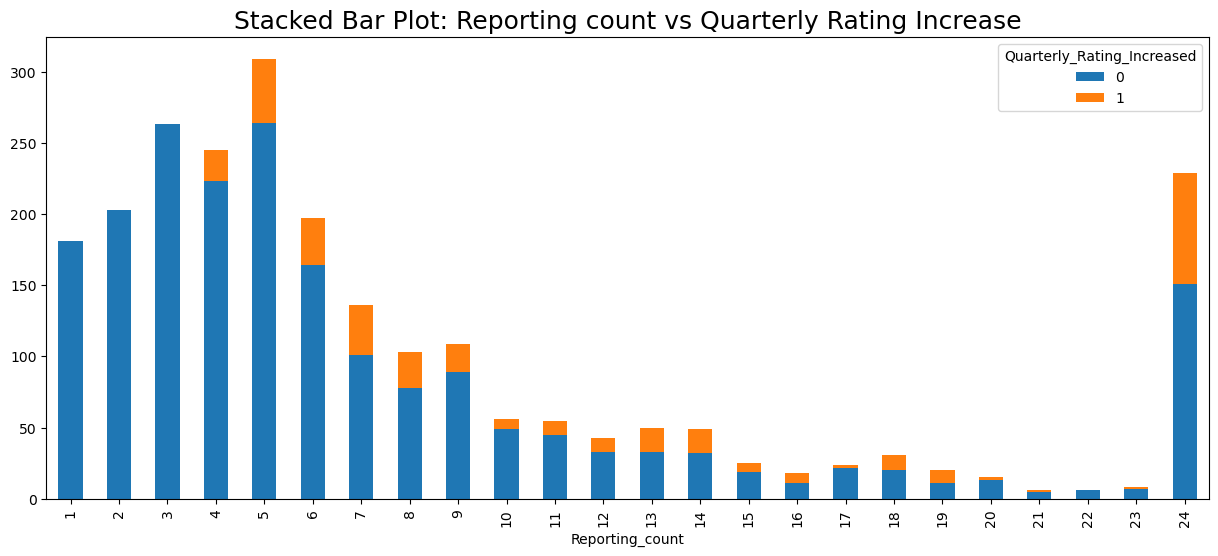

In [187]:
df_counts = pd.crosstab(df2["Reporting_count"], df2["Quarterly_Rating_Increased"])
df_counts.plot(kind="bar", stacked=True, figsize=(15,6))
plt.title("Stacked Bar Plot: Reporting count vs Quarterly Rating Increase",fontsize=18)
plt.show()

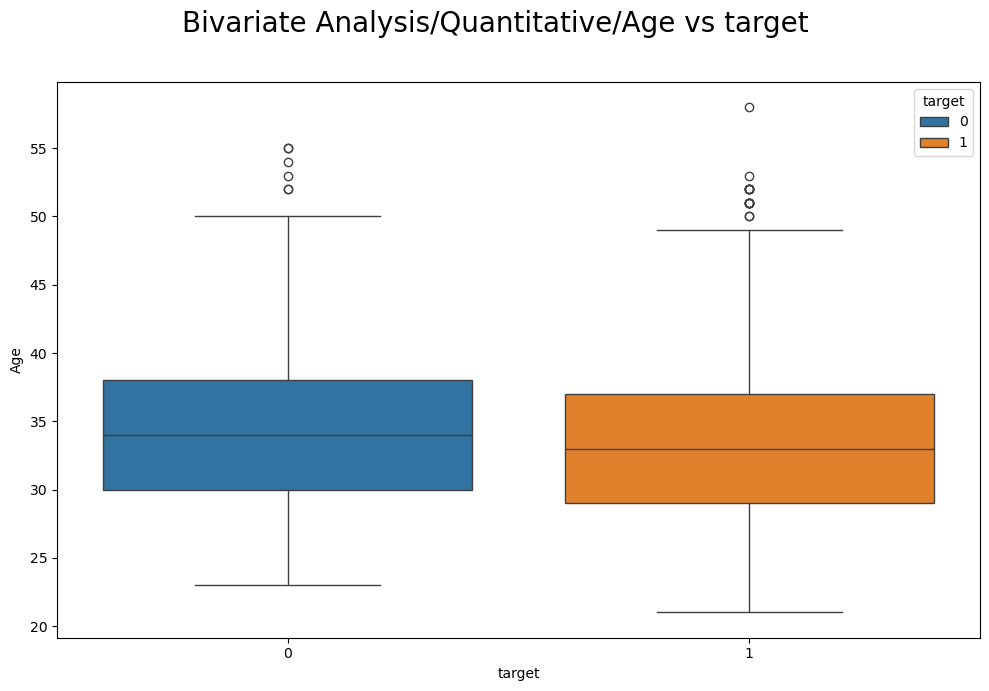

In [188]:
fig = plt.figure(figsize=(10,7)).suptitle("Bivariate Analysis/Quantitative/Age vs target",fontsize=20) 
sns.boxplot(x="target",y="Age",hue="target", data=df2) 
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

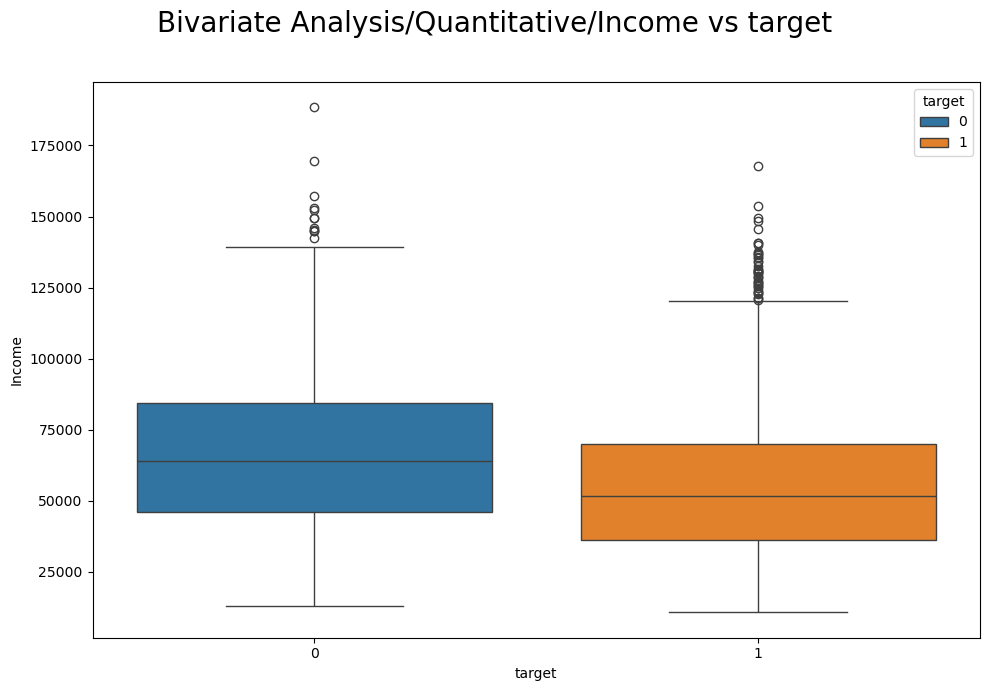

In [189]:
fig = plt.figure(figsize=(10,7)).suptitle("Bivariate Analysis/Quantitative/Income vs target",fontsize=20) 
sns.boxplot(x="target",y="Income",hue="target", data=df2) 
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

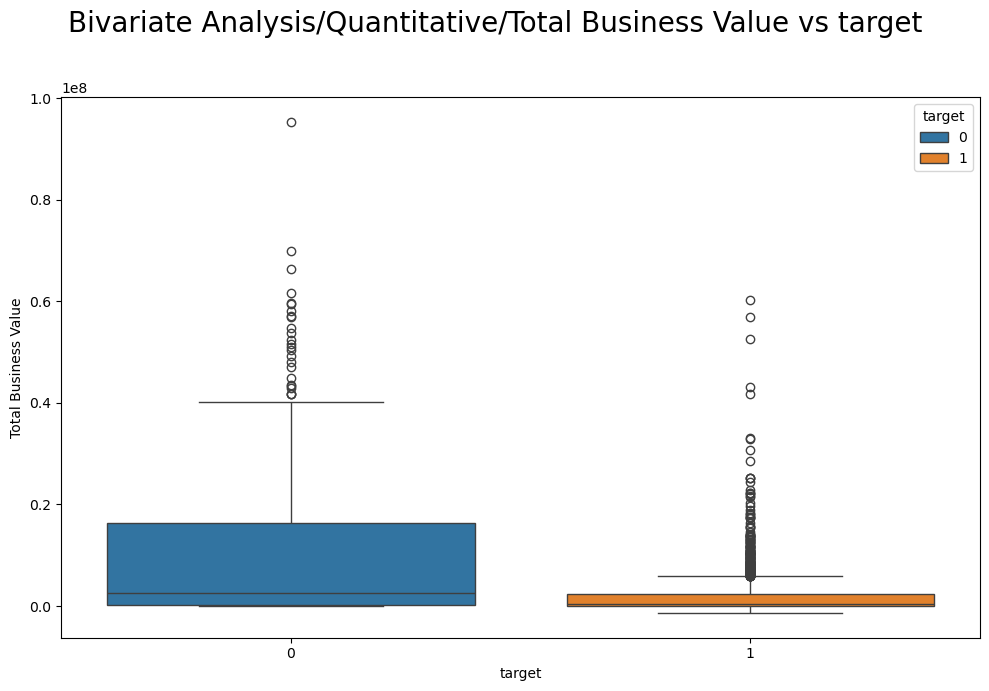

In [190]:
fig = plt.figure(figsize=(10,7)).suptitle("Bivariate Analysis/Quantitative/Total Business Value vs target",fontsize=20) 
sns.boxplot(x="target",y="Total Business Value",hue="target", data=df2) 
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Insights from the Graphical Analysis/EDA

- **The fraction of gender and education is more or less same for both the employees who left the organization and those who did not leave.**
- **The employees in city C20 is more likely to leave the organization.**
- **The employees with joining designation as 1 are more likely to leave the organization.**
- **The employees who have their grade as 1 or 2  are more likely to leave the organization while employess at grade 3-5 have equal probability of staying/leaving the organization.**
- **The employees who have their last quarterly rating as 3 or 4 are less likely to leave the organization while employees with their last quarterly rating as 1 is highly likely to leave the organization.**
- **The employees who saw an increase in their quarterly rating or income is most likely to continue with the organization.**
- **More is the reporting count higher is the total business value as well as quarterly rating.**
- **Employees in all age range have equal probability of staying/leaving the organization.**
- **The employees who have less income range are more likely to leave the organization.**
- **Employees having less Total Business Value range are having high probability of leaving the organization.**
- **Employees having high Reporting count have high chances of increase in Quarterly Rating.**



In [191]:
crr=num_cols.corr()
crr

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
Age,1.000000,0.040261,-0.010245,0.191112,-0.006641,0.210702,0.108835,0.171818
Gender,0.040261,1.000000,-0.010123,0.013229,-0.050878,0.002076,0.008909,0.008099
Education_Level,-0.010245,-0.010123,1.000000,0.115008,0.002041,-0.039552,-0.007504,0.026064
Income,0.191112,0.013229,0.115008,1.000000,0.380878,0.778383,0.234044,0.116897
Joining Designation,-0.006641,-0.050878,0.002041,0.380878,1.000000,0.559854,-0.044446,-0.237791
Grade,0.210702,0.002076,-0.039552,0.778383,0.559854,1.000000,0.220955,0.014445
Total Business Value,0.108835,0.008909,-0.007504,0.234044,-0.044446,0.220955,1.000000,0.471224
Quarterly Rating,0.171818,0.008099,0.026064,0.116897,-0.237791,0.014445,0.471224,1.000000


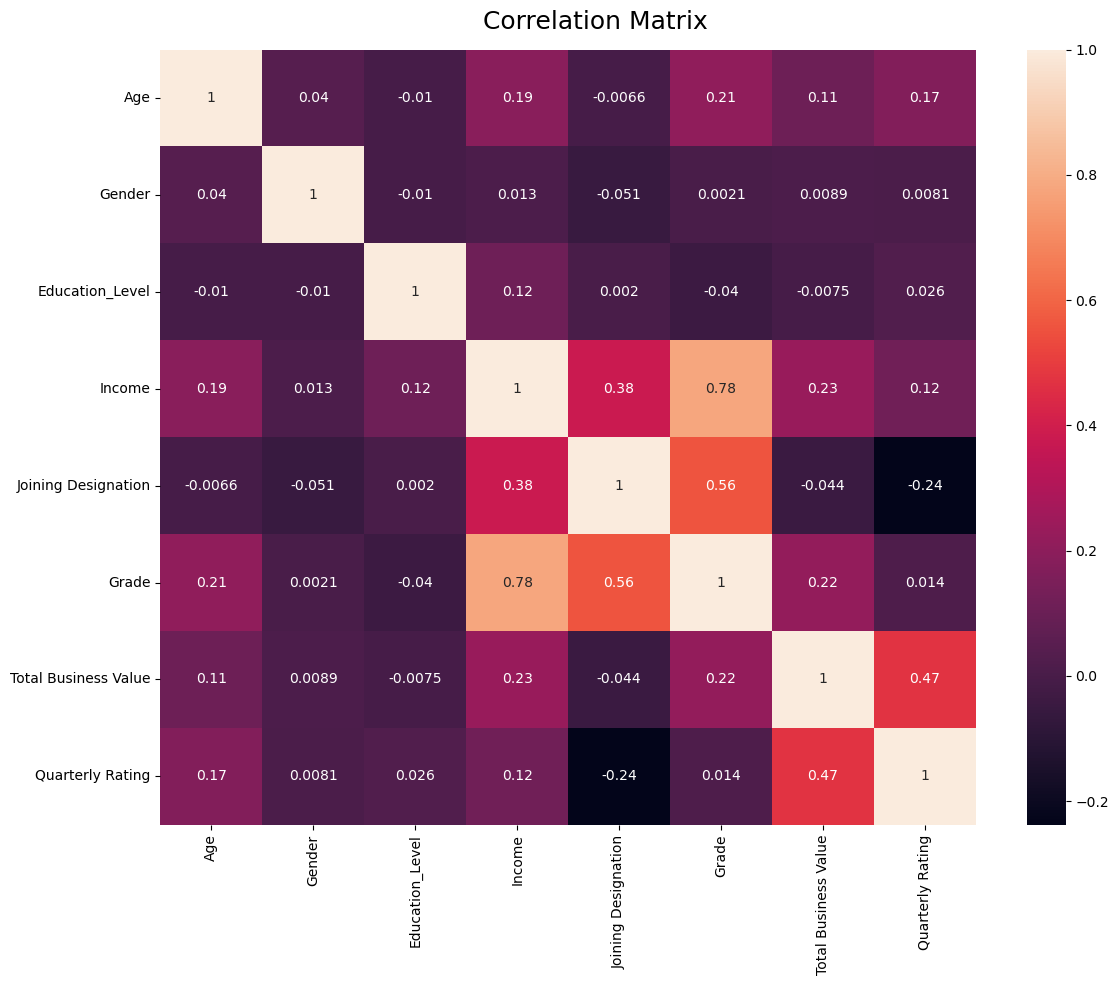

In [192]:
fig = plt.figure(figsize=(12,10)).suptitle("Correlation Matrix",fontsize=18) 
sns.heatmap(crr,annot=True)
plt.tight_layout()
plt.show()

In [193]:
num_cols1 = df2.select_dtypes(include="number")

In [194]:
crr1=num_cols1.corr()
crr1

,Driver_ID,Reporting_count,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,target,Income_Increased
Driver_ID,1.000000,0.026467,-0.009786,0.015797,-0.014343,-0.017876,-0.023126,-0.013897,0.015133,0.012889,-0.009560,0.029269,-0.015433
Reporting_count,0.026467,1.000000,0.315473,0.019495,0.020455,0.275418,-0.182404,0.249104,0.791473,0.545020,0.274367,-0.345718,0.293425
Age,-0.009786,0.315473,1.000000,0.028830,-0.007674,0.207090,0.070883,0.247759,0.269681,0.157643,0.051755,-0.080631,0.116798
Gender,0.015797,0.019495,0.028830,1.000000,-0.009422,0.005950,-0.047746,-0.004873,0.016842,0.023229,0.028204,0.010147,0.021295
Education_Level,-0.014343,0.020455,-0.007674,-0.009422,1.000000,0.140189,0.003203,-0.017352,0.001392,0.006544,0.020580,-0.007953,-0.024443
Income,-0.017876,0.275418,0.207090,0.005950,0.140189,1.000000,0.480523,0.741453,0.379468,0.163429,0.108114,-0.201935,0.090536
Joining Designation,-0.023126,-0.182404,0.070883,-0.047746,0.003203,0.480523,1.000000,0.712459,-0.121368,-0.063404,0.068936,-0.127773,-0.083492
Grade,-0.013897,0.249104,0.247759,-0.004873,-0.017352,0.741453,0.712459,1.000000,0.382062,0.120442,0.104131,-0.225585,0.146905
Total Business Value,0.015133,0.791473,0.269681,0.016842,0.001392,0.379468,-0.121368,0.382062,1.000000,0.544176,0.220803,-0.379552,0.424532
Quarterly Rating,0.012889,0.545020,0.157643,0.023229,0.006544,0.163429,-0.063404,0.120442,0.544176,1.000000,0.691953,-0.510532,0.251623


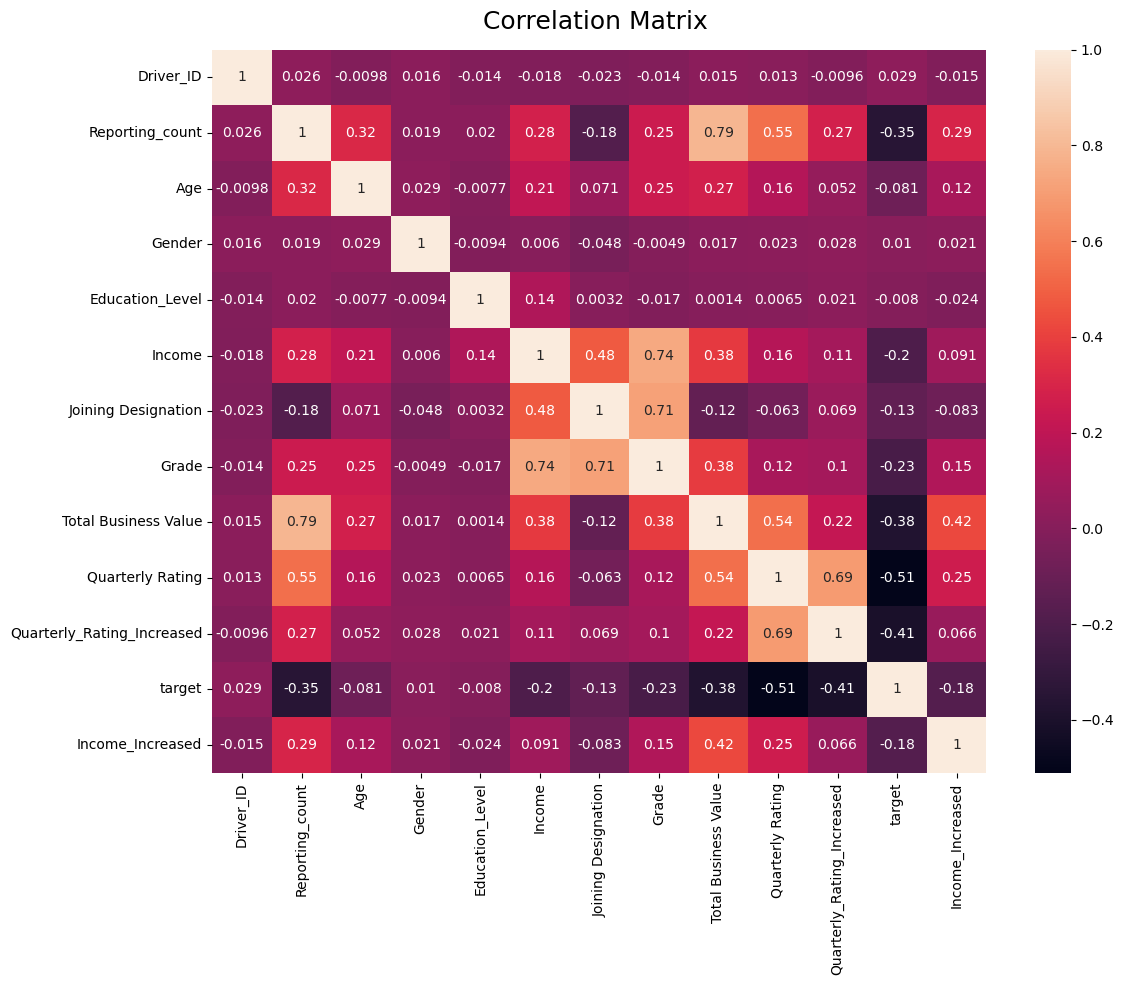

In [195]:
fig = plt.figure(figsize=(12,10)).suptitle("Correlation Matrix",fontsize=18) 
sns.heatmap(crr1,annot=True)
plt.tight_layout()
plt.show()

- **There exists a strong correlation between grade and income column, indicating that higher grade corresponds to higher income.**
- **The Columns reporting_count and total business value is also showing a strong correlation indicating that more the employees reported higher the business value they got.**
- **There is a good correlation between quarterly rating and total business value as well.**
- **The columns joining designation and grade is also showing a very strong correlation indicating employees who joined on good grade is having higher grades.**
- **Rest all other columns in dataset is weakly or moderately correlated showing there isn't much autocorrelation between the independend variables.**
- **Finally quarterly rating and target column is having a strong negative correlation showing as the rating is decreasing, the churn rate of employee is increasing.**

In [196]:
df2.head()

,Driver_ID,Reporting_count,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,target,Income_Increased
0,1,3,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1.0,1.0,1715580.0,2.0,0,1,0
1,2,2,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaT,2.0,2.0,0.0,1.0,0,0,0
2,4,5,43.0,0.0,C13,2.0,65603.0,2019-12-07,2020-04-27,2.0,2.0,350000.0,1.0,0,1,0
3,5,3,29.0,0.0,C9,0.0,46368.0,2019-01-09,2019-03-07,1.0,1.0,120360.0,1.0,0,1,0
4,6,5,31.0,1.0,C11,1.0,78728.0,2020-07-31,NaT,3.0,3.0,1265000.0,2.0,1,0,0


In [197]:
df2["year"] = df2["Dateofjoining"].dt.year
df2["month"] = df2["Dateofjoining"].dt.month

In [198]:
df2.drop(columns=["Driver_ID","Dateofjoining","LastWorkingDate"],inplace=True)

In [199]:
df2.head(1)

,Reporting_count,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,target,Income_Increased,year,month
0,3,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,1,0,2018,12


### Data processing for model building

In [200]:
y = df2["target"]
x = df2.drop(["target"], axis = 1)

In [201]:
y.value_counts()

target
1    1616
0     765
Name: count, dtype: int64

**Data is highly imbalanced. so, we need to do oversample the minority class.**

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=7,
                                                    stratify=y)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1904, 14)
Number transactions y_train dataset:  (1904,)
Number transactions X_test dataset:  (477, 14)
Number transactions y_test dataset:  (477,)


### Target Encoding

In [203]:
import category_encoders as ce

ce_target = ce.TargetEncoder(cols = ["City"])
X_train = ce_target.fit_transform(X_train, y_train)
X_test = ce_target.transform(X_test)

- Here we are using target encoding to convert categorical feature because humber of unique features in city column is 29, which is quite high and using onehotencoding here will increase the dimensions of data very much.
- As the data type in city column is non-ordinal so we can't use label encoding here.
- So target encoding seems to be the best encoding technique which can be applied here.

In [204]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

### Standardization

In [205]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=x.columns)

### Class Imbalance treatment/Upsampling using SMOTE

In [206]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({1: 1292, 0: 1292})


In [207]:
X_sm = pd.DataFrame(X_sm, columns=x.columns)

In [208]:
X_sm.head()

,Reporting_count,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,Income_Increased,year,month
0,-1.030165,0.038657,-0.842662,-2.081837,1.216768,-0.625991,-0.964987,-1.165866,-0.507072,-0.522158,-0.415227,-0.130744,-0.330531,0.847048
1,-0.588964,-0.460906,-0.842662,-0.780590,1.216768,-0.756278,0.218101,-0.103756,-0.449624,0.736309,2.408319,-0.130744,0.916905,-2.060607
2,1.028775,0.205177,-0.842662,-1.147046,-0.011613,0.022159,0.218101,-0.103756,0.071082,-0.522158,-0.415227,-0.130744,0.293187,-0.445243
3,-0.588964,0.371698,1.188774,1.577095,1.216768,-1.369444,-0.964987,-1.165866,-0.485267,-0.522158,-0.415227,-0.130744,0.916905,0.523975
4,0.146372,-0.960468,-0.842662,0.589431,-0.011613,-0.367524,-0.964987,-1.165866,-0.365985,-0.522158,-0.415227,-0.130744,-1.577968,1.493194


In [209]:
X_sm.shape

(2584, 14)

## Model Building

### DecisionTreeClassifier

In [210]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate, cross_val_score

kfold = KFold(n_splits=10)

depths = [3,4,5,6,7,9,11,13,15]

for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=7, max_depth=depth)

    cv_acc_results = cross_validate(tree_clf, X_sm, y_sm, cv = kfold, scoring = "accuracy", return_train_score = True)

    print(f"K-Fold for depth:{depth} Accuracy Mean: Train: {cv_acc_results["train_score"].mean()*100} Validation: {cv_acc_results["test_score"].mean()*100}")
    print(f"K-Fold for depth: {depth} Accuracy Std: Train: {cv_acc_results["train_score"].std()*100} Validation: {cv_acc_results["test_score"].std()*100}")
    print("-"*250)

K-Fold for depth:3 Accuracy Mean: Train: 91.49037435627179 Validation: 90.36589745892073
K-Fold for depth: 3 Accuracy Std: Train: 0.28664294182133565 Validation: 1.3629957035734057
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
K-Fold for depth:4 Accuracy Mean: Train: 91.7526789263954 Validation: 90.01735955224328
K-Fold for depth: 4 Accuracy Std: Train: 0.297404958347525 Validation: 1.357280842064243
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
K-Fold for depth:5 Accuracy Mean: Train: 93.86396323930508 Validation: 91.06207536440095
K-Fold for depth: 5 Accuracy Std: Train: 0.28749872

In [211]:
tree_clf = DecisionTreeClassifier(random_state=7, max_depth=5)
tree_clf=tree_clf.fit(X_sm, y_sm)
y_pred = tree_clf.predict(X_test)

In [212]:
tree_clf.score(X_sm, y_sm)

0.934984520123839

In [213]:
tree_clf.score(X_test, y_test)

0.9119496855345912

### Confusion Matrix

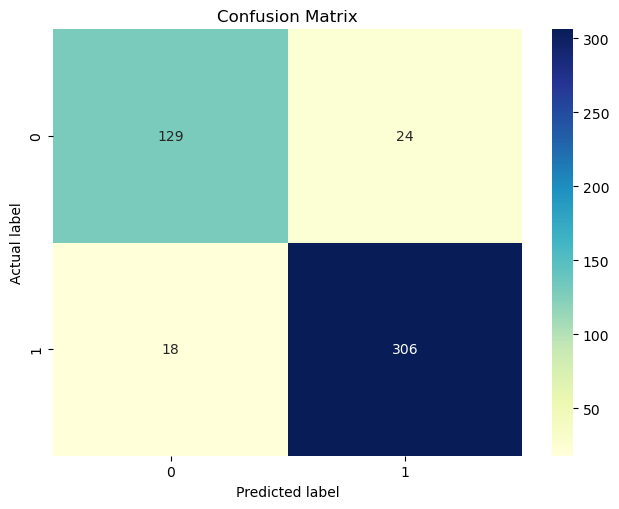

In [214]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt="g")

plt.tight_layout()
plt.title("Confusion Matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

### Classification Report 

In [215]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       153
           1       0.93      0.94      0.94       324

    accuracy                           0.91       477
   macro avg       0.90      0.89      0.90       477
weighted avg       0.91      0.91      0.91       477



### ROC AUC Curve

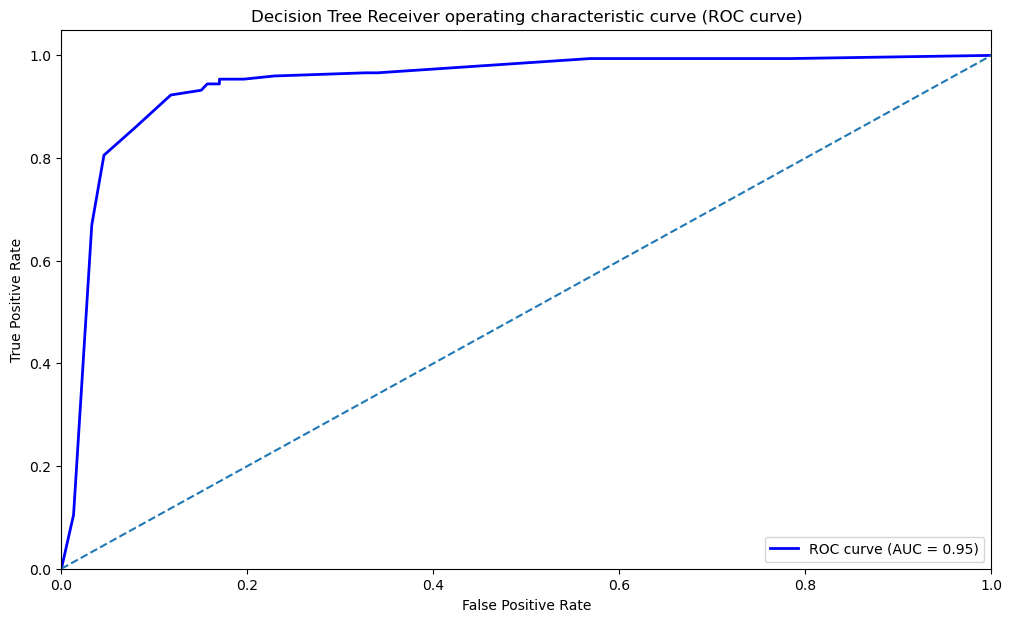

In [216]:
# Predict probabilities for the test set
# Probabilities for the positive class
y_prob = tree_clf.predict_proba(X_test)[:, 1]  

# Calculate the ROC curve
fpr,tpr,thresholds = roc_curve(y_test, y_prob)


# Calculate the AUC
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(12,7))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree Receiver operating characteristic curve (ROC curve)")
plt.legend(loc="lower right")
plt.show()

In [217]:
roc_auc_score(y_test, y_prob)

0.9455942870975551

### P-R AUC Curve

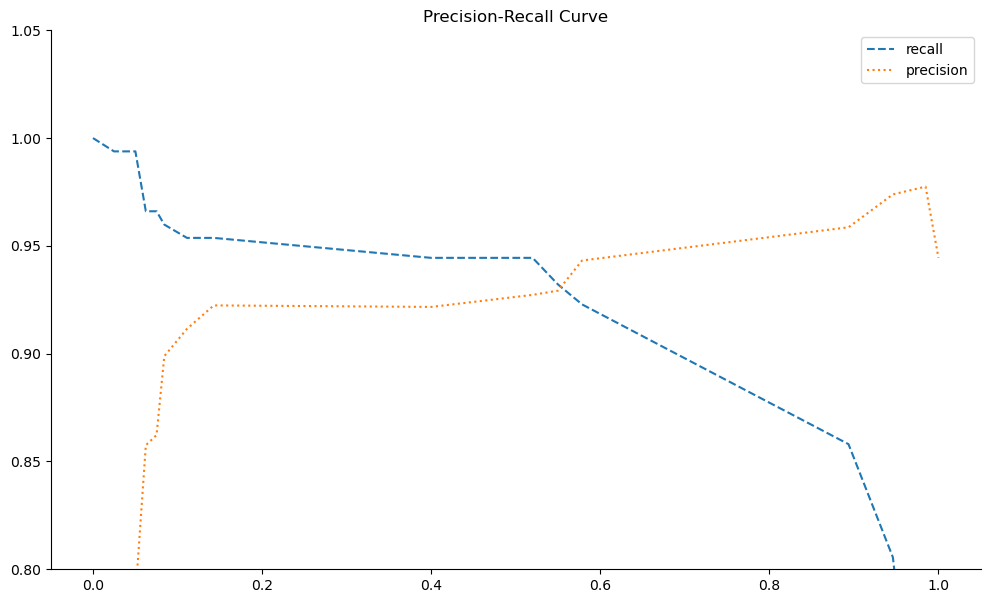

In [218]:
precision, recall, thresholds = precision_recall_curve(y_test,tree_clf.predict_proba(X_test)[:,1])

plt.figure(figsize=(12,7))
plt.plot(thresholds, recall[0:thresholds.shape[0]], label="recall",linestyle="--")
plt.plot(thresholds, precision[0:thresholds.shape[0]], label="precision",linestyle="dotted")
plt.ylim([0.8, 1.05])
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
sns.despine()
plt.show()

In [219]:
auc(recall, precision).round(3)

0.956

### RandomForestClassifier

In [220]:
# Defining parameters
params = {
          "n_estimators" : [100,200,300,400],
          "max_depth" : [3,5,10],
          "min_samples_split": [2, 5, 10],
          "criterion" : ["gini", "entropy"],
          "bootstrap" : [True, False],
          "max_features": ["auto", "sqrt", "log2"],
          "ccp_alpha": [0.0, 0.01, 0.1, 0.2] 
         }

In [221]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = params,
                    scoring = "accuracy",
                    cv = 3,
                    n_jobs=-1
                    )

In [222]:
grid.fit(X_sm, y_sm)

print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}
Best score:  0.9400223485164915


In [248]:
rf_clf = RandomForestClassifier(random_state=7, bootstrap=True, ccp_alpha=0.0, criterion="entropy",
                              max_depth=10, max_features="sqrt",min_samples_split=2, n_estimators=300)

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rf_clf, X_sm, y_sm, cv=kfold, scoring="accuracy", return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results["train_score"].mean()*100:.3f} \n Validation: {cv_acc_results["test_score"].mean()*100:.3f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results["train_score"].std()*100:.3f}, \n Validation: {cv_acc_results["test_score"].std()*100:.3f}")

K-Fold Accuracy Mean: 
 Train: 98.155 
 Validation: 93.500
K-Fold Accuracy Std: 
 Train: 0.154, 
 Validation: 2.012


In [249]:
rf_clf=rf_clf.fit(X_sm, y_sm)
rf_clf.score(X_sm, y_sm)

0.9802631578947368

In [250]:
rf_clf.score(X_test, y_test)

0.9350104821802935

In [251]:
y_pred = rf_clf.predict(X_test)

### Confusion Matrix

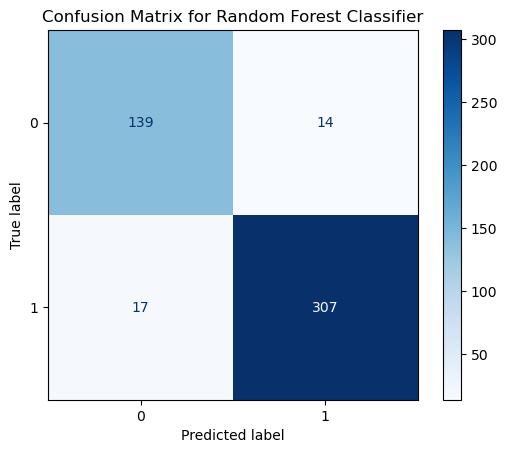

Confusion Matrix:
[[139  14]
 [ 17 307]]


In [252]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

# Optionally, print the confusion matrix as a raw text
print("Confusion Matrix:")
print(cm)


### Classification Report

In [253]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       153
           1       0.96      0.95      0.95       324

    accuracy                           0.94       477
   macro avg       0.92      0.93      0.93       477
weighted avg       0.94      0.94      0.94       477



### ROC AUC Curve

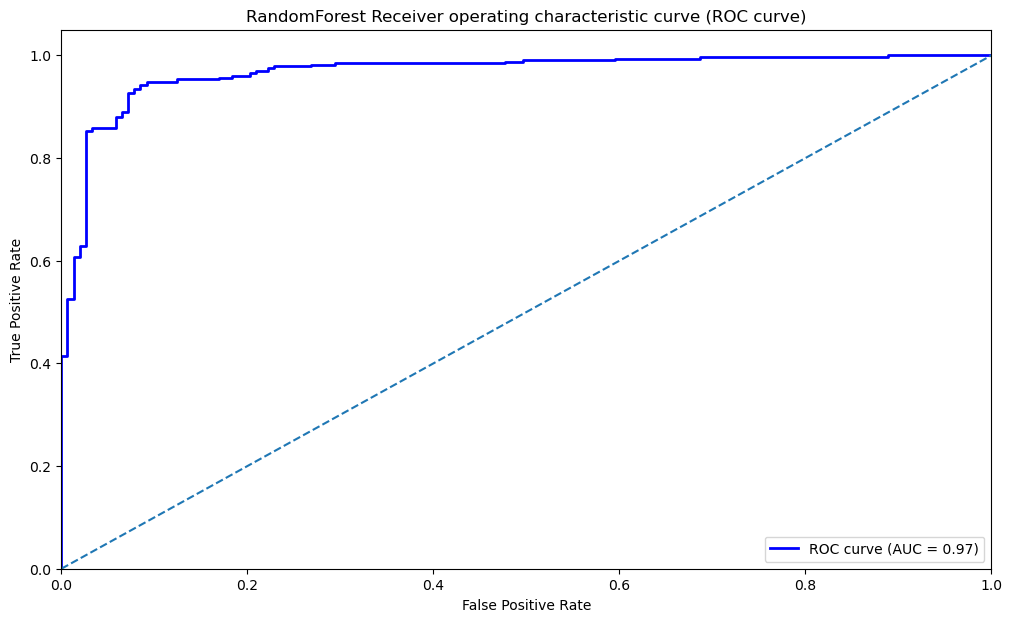

In [254]:
# Predict probabilities for the test set
# Probabilities for the positive class
y_prob = rf_clf.predict_proba(X_test)[:, 1]  

# Calculate the ROC curve
fpr,tpr,thresholds = roc_curve(y_test, y_prob)


# Calculate the AUC
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(12,7))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RandomForest Receiver operating characteristic curve (ROC curve)")
plt.legend(loc="lower right")
plt.show()

In [255]:
roc_auc_score(y_test, y_prob)

0.9681271685628984

### P-R AUC Curve

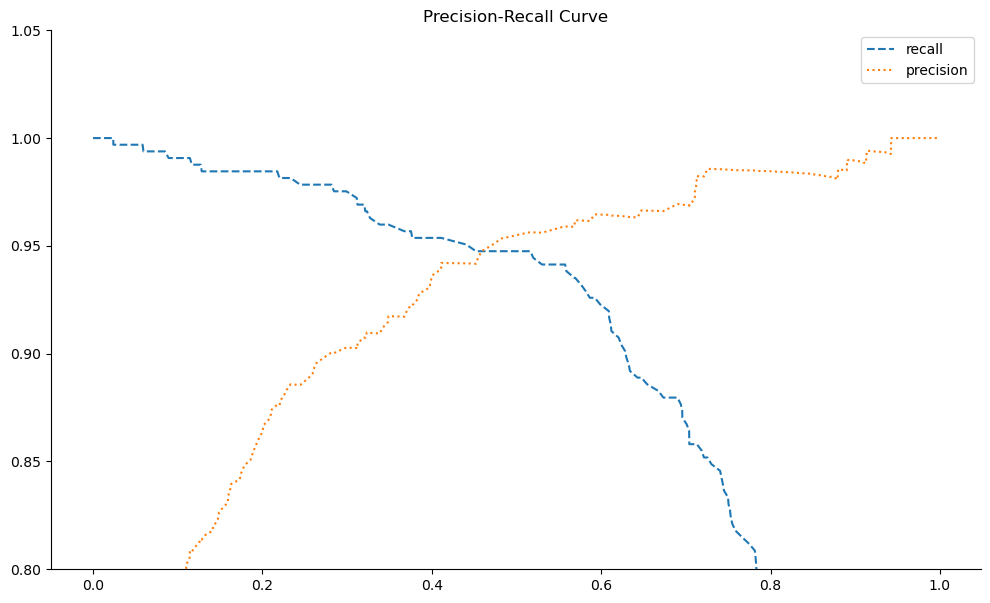

In [256]:
precision, recall, thresholds = precision_recall_curve(y_test,rf_clf.predict_proba(X_test)[:,1])

plt.figure(figsize=(12,7))
plt.plot(thresholds, recall[0:thresholds.shape[0]], label="recall",linestyle="--")
plt.plot(thresholds, precision[0:thresholds.shape[0]], label="precision",linestyle="dotted")
plt.ylim([0.8, 1.05])
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
sns.despine()
plt.show()

In [257]:
auc(recall, precision).round(3)

0.984

### XgboostClassifier

In [258]:
from xgboost import XGBClassifier

# Defining parameters 
params = {
    "n_estimators": [50, 100, 200],  # Number of trees
    "learning_rate": [0.01, 0.1, 0.2],  # Step size shrinking
    "max_depth": [3, 5, 7],  # Maximum depth of each tree
    "subsample": [0.7, 0.8, 1.0],  # Fraction of samples to use for each tree
    "colsample_bytree": [0.7, 0.8, 1.0],  # Fraction of features to use for each tree
    "gamma": [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition
    "reg_alpha": [0, 0.1, 1.0],  # L1 regularization term on weights
    "reg_lambda": [1.0, 1.5, 2.0]  # L2 regularization term on weights
}

xgb = XGBClassifier(random_state=2)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=params,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1
                          )

# Fit the model with the best hyperparameters
grid_search.fit(X_sm, y_sm)

# Print the best parameters from the grid search
print("Best params: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best params:  {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1.0, 'subsample': 0.7}
Best score:  0.9469854407509034


In [259]:
# Use the best model from GridSearchCV to make predictions
xgb_clf = grid_search.best_estimator_
xgb_clf.fit(X_sm, y_sm)

y_pred = xgb_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.24%


In [260]:
xgb_clf.score(X_sm, y_sm)

1.0

In [261]:
xgb_clf.score(X_test, y_test)

0.9224318658280922

### Confusion Matrix

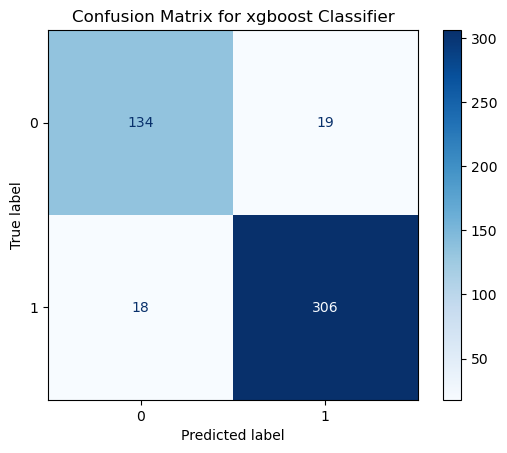

In [262]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix for xgboost Classifier")
plt.show()

### Classification Report

In [263]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       153
           1       0.94      0.94      0.94       324

    accuracy                           0.92       477
   macro avg       0.91      0.91      0.91       477
weighted avg       0.92      0.92      0.92       477



### ROC AUC Curve

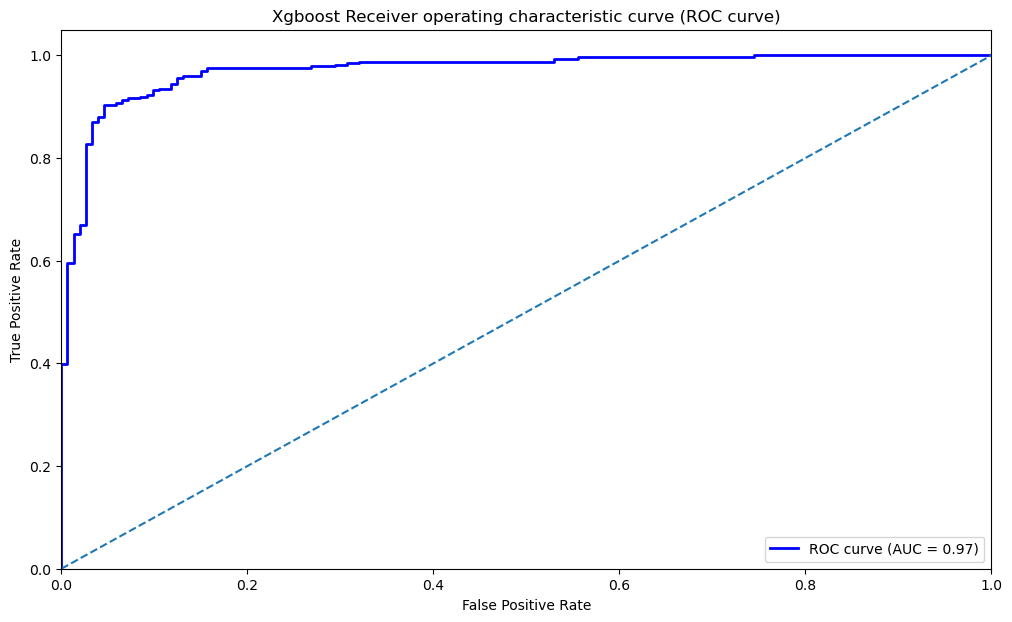

In [264]:
# Predict probabilities for the test set
# Probabilities for the positive class
y_prob = xgb_clf.predict_proba(X_test)[:, 1]  

# Calculate the ROC curve
fpr,tpr,thresholds = roc_curve(y_test, y_prob)


# Calculate the AUC
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(12,7))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Xgboost Receiver operating characteristic curve (ROC curve)")
plt.legend(loc="lower right")
plt.show()

In [265]:
roc_auc

0.971677559912854

### P-R AUC Curve

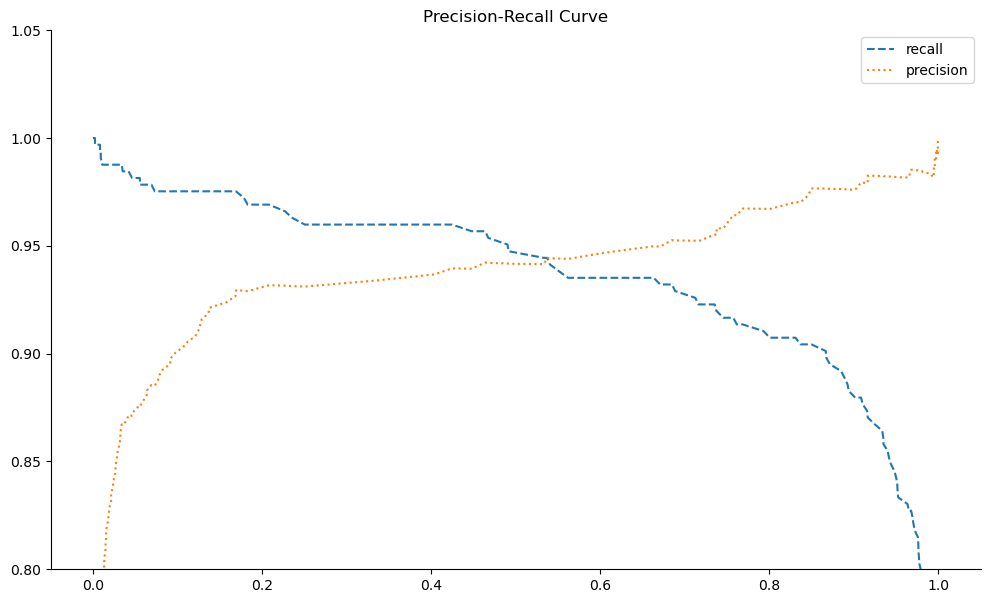

In [266]:
precision, recall, thresholds = precision_recall_curve(y_test,xgb_clf.predict_proba(X_test)[:,1])

plt.figure(figsize=(12,7))
plt.plot(thresholds, recall[0:thresholds.shape[0]], label="recall",linestyle="--")
plt.plot(thresholds, precision[0:thresholds.shape[0]], label="precision",linestyle="dotted")
plt.ylim([0.8, 1.05])
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
sns.despine()
plt.show()

In [267]:
auc(recall, precision).round(3)

0.986

### Model Interpretation

- The accuracy of all the models are more than 90% on the test data indicating all the models are correctly predicting more than 90% of the time which signifies that the model is making a large number of correct predictions compared to incorrect ones.
- Precision and Recall in all the models are  around 90 % and above, showing our model is quite effective in  distinguishing between both the classes.

- The ROC curve area in all the models is above 95% indicating that the model is effectively separating both classes more than 95% of the time and the model has a high ability to distinguish between both the classes. It is highly likely to predict positives as positives and negatives as negatives consistently across different thresholds.
- Our model has very high precision which means that when the model predicts a positive outcome, it is very likely to be correct.
- As our model is having very high true positive and very less false positive it is most likely that model won't predict a non-churn class as a churn class.
- In this case recall is more important than precision and we have recall score of 0.95 which means we have very high true positive and very less false negative indicating that our model is highly efficient in predicting churn class as churn without doing much error.
- So the model is having high true positive rate, very less false negative rate, very good accuracy signifying that the model is highly efficient in predicting churn rate.

### Feature Importance

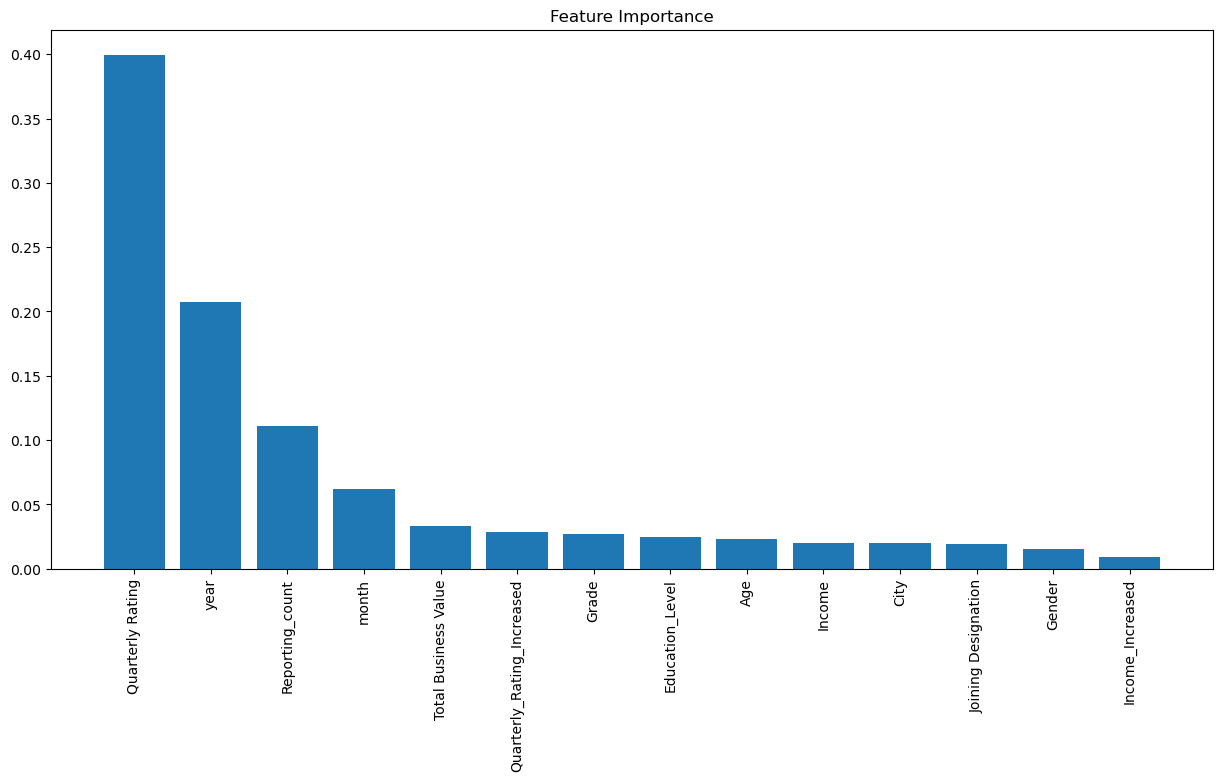

In [268]:
importances = xgb_clf.feature_importances_

indices = np.argsort(importances)[::-1] 
names = [X_sm.columns[i] for i in indices] 

plt.figure(figsize=(15, 7)) 
plt.title("Feature Importance") 
plt.bar(range(X_sm.shape[1]), importances[indices]) 
plt.xticks(range(X_sm.shape[1]), names, rotation=90) 
plt.show() 

In [269]:
df_param_coeff = pd.DataFrame(columns=["Feature", "Coefficient"])
for i in range(len(list(X_sm.columns))):
    feat = X_sm.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,Quarterly Rating,0.399046
1,year,0.207767
2,Reporting_count,0.110778
3,month,0.061921
4,Total Business Value,0.033586
5,Quarterly_Rating_Increased,0.028848
6,Grade,0.027040
7,Education_Level,0.024502
8,Age,0.022830
9,Income,0.020118


### Feature Importance Interpretation

In [270]:
pd.crosstab(df2["year"],df2["target"], normalize = "index")

target,0,1
year,,
2013,0.390244,0.609756
2014,0.724138,0.275862
2015,0.504587,0.495413
2016,0.379630,0.620370
2017,0.232558,0.767442
2018,0.116861,0.883139
2019,0.172589,0.827411
2020,0.537897,0.462103


**Year of joining is having high importance on churn rate and from the crosstab we cas see that employess who joined in year 2018 is having highest churn rate of 88% followed by year 2019 having churn rate of 82%.**

In [271]:
pd.crosstab(df2["Quarterly Rating"],df2["target"], normalize = "index")

target,0,1
Quarterly Rating,,
1.0,0.178899,0.821101
2.0,0.596685,0.403315
3.0,0.833333,0.166667
4.0,0.906542,0.093458


**Quarterly rating faeature is also having very high feature importance indicating 82% of the employess who have rating as 1 left the company followed by 40% employees having rating as 2.**

In [272]:
pd.crosstab(df2["Quarterly_Rating_Increased"],df2["target"], normalize = "index")

target,0,1
Quarterly_Rating_Increased,,
0,0.24172,0.75828
1,0.77095,0.22905


**Increase in quarterly rating is also having good feature importance showing 75% of the employess who didn't got raise in their quarterly rating left the company.**

### Actionable Insights


- Quarterly rating is having a high feature importance in all the models describing with increase in quartely rating the chances of churn is reducing.

- Quarterly rating of 3 and above have less chances of churn so, accordingly rating should be provided to reduce churn.

- Reporting count feature is also havig good feature importance in all the models showing more the employee reported for the job lesser is the chances of their churn.

- More is the reporting count of the employees higher is their total business value as well as quarterly rating so employees should be motivated to work more which will ultimately increase both their rating as well as business value.

- Employees in city C20 is showing high churn rate, meaning their is some issue in this particular city.So, company should focus more on finding the problem of the drivers in this city and provide targeted solution for the same.

- Also with increase in the income of the drivers the churn rate is decreasing.So, company should focus on providing incentives and bonuses to the drivers which will help in increasing their income and ultimately reducing the churn rate.

### Recommendations

- Develop dynamic incentive systems that provide drivers with higher rewards during times of high demand or for completing difficult rides 
which will help in improving driver satisfaction, engagement, and retention.

- Segment drivers into categories like high performing drivers, underperforming drivers, and at-risk drivers and apply targeted retention strategies for each segment such as offering exclusive rewards or recognition, special privileges like priority rides for high performing drivers, providing training or additional support for underperforming drivers and offering targeted incentives for at-risk drivers.


- Apply sentiment analysis to assess whether a driver is satisfied or dissatisfied based on their communication with Ola's support or feedback.
If negative sentiment is detected, flag these drivers as high-risk and take corrective actions like improving customer support,proactive engagement of support with these drivers, offering rewards such as flexible hours, bonus payments for high engagement.

- Offer milestone based rewards to motivate drivers such as providing badges, streaks or rankings after completing a certain number of rides or providing extra benefits after driving a certain number of hours.

- Develop models to detect when drivers may be working too many hours or are experiencing burnout, and provide flexible scheduling options, mental health resources and extra bonuses to those drivers to reduce extra pressure and fatigue, improving their overall satisfaction and reducing churn.